In [188]:
import numpy as np 
import matplotlib.pyplot as plt 

In [189]:
X=np.linspace(-5,5,1000)
y=225+(82*X)-(90*X*X)+(44*X*X*X)+-(8*pow(X,4))+(0.7*pow(X,5))


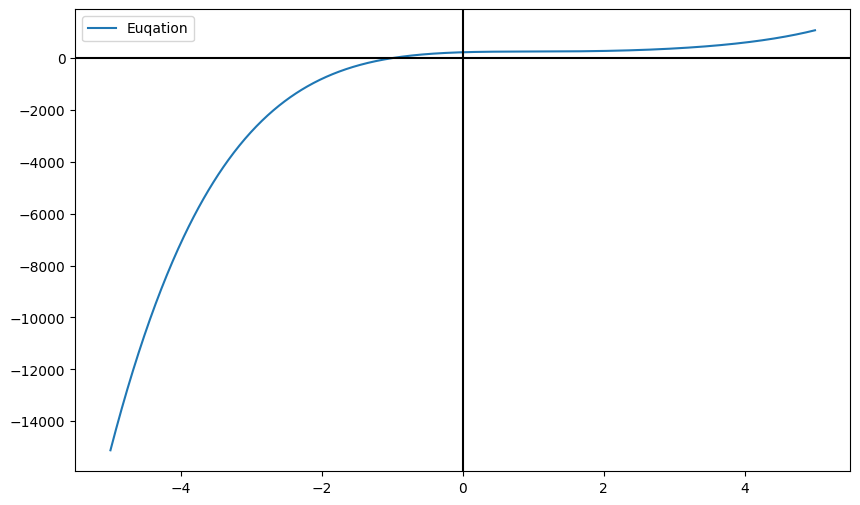

In [190]:
plt.figure(figsize=(10,6))
plt.plot(X,y,label="Euqation")
plt.axhline(0,color='black')
plt.axvline(0,color='black')
plt.legend()
plt.show()

In [191]:
def equation(x):
    y=225+(82*x)-(90*x*x)+(44*x*x*x)+-(8*pow(x,4))+(0.7*pow(x,5))
    return round(y,10)

In [192]:
def f(x):
    return 225 + 82*x - 90*x**2 + 44*x**3 - 8*x**4 + 0.7*x**5

In [ ]:
def bisection_method(xl, xu, es_threshold=0.05, max_iterations=1000, verbose=True):
    
    if f(xl) * f(xu) >= 0:
        raise ValueError("Error: f(xl) and f(xu) must have opposite signs")
    iteration = 0
    results = []
    xr_old = 0
    converged = False
    
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xl':<15} {'xu':<15} {'xr (root)':<15} {'f(xr)':<15} {'εa (%)':<12}")
        print("="*80)
    
    while iteration < max_iterations:
        iteration += 1
        xr = (xl + xu) / 2.0 
        f_xr = f(xr)
        if iteration > 1:
            ea = abs((xr - xr_old) / xr) * 100 if xr != 0 else 0
        else:
            ea = float('inf')
           
        
        results.append({
            'Iteration': iteration,
            'xl': xl,
            'xu': xu, 
            'xr': xr,
            'f(xr)': f_xr,
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        
        if verbose:
            ea_str = f"{ea:.8f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {xl:<15.10f} {xu:<15.10f} {xr:<15.10f} {f_xr:<15.10f} {ea_str:<12}")
        
        
        if iteration > 1 and ea < es_threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {es_threshold}%")
            break
        
        
        if f(xl) * f_xr < 0:
            xu = xr  
        else:
            xl = xr  
        
        xr_old = xr
    
    if not converged and verbose:
        print(f"Maximum iterations ({max_iterations}) reached without convergence")
    
    return results, xr


In [194]:
xl_initial = -1.2
xu_initial = -1.0
stopping_criterion = 0.05  

results, final_root = bisection_method(xl_initial, xu_initial, stopping_criterion)

print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")


Iter  xl              xu              xr (root)       f(xr)           εa (%)      
1     -1.2000000000   -1.0000000000   -1.1000000000   -45.5041570000  N/A         
2     -1.1000000000   -1.0000000000   -1.0500000000   -21.8779470938  4.76190476  
3     -1.0500000000   -1.0000000000   -1.0250000000   -10.6119263740  2.43902439  
4     -1.0250000000   -1.0000000000   -1.0125000000   -5.1121936404   1.23456790  
5     -1.0125000000   -1.0000000000   -1.0062500000   -2.3952155937   0.62111801  
6     -1.0062500000   -1.0000000000   -1.0031250000   -1.0448951122   0.31152648  
7     -1.0031250000   -1.0000000000   -1.0015625000   -0.3717703362   0.15600624  
8     -1.0015625000   -1.0000000000   -1.0007812500   -0.0357159820   0.07806401  
9     -1.0007812500   -1.0000000000   -1.0003906250   0.1321842907    0.03904725  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0390472472% < 0.05%

FINAL RESULT:
Root: x = -1.0003906250
f(x) = 0.1321842907
Total iterations: 9


In [195]:
print(results[1]['ea(%)'])

4.761904761904765


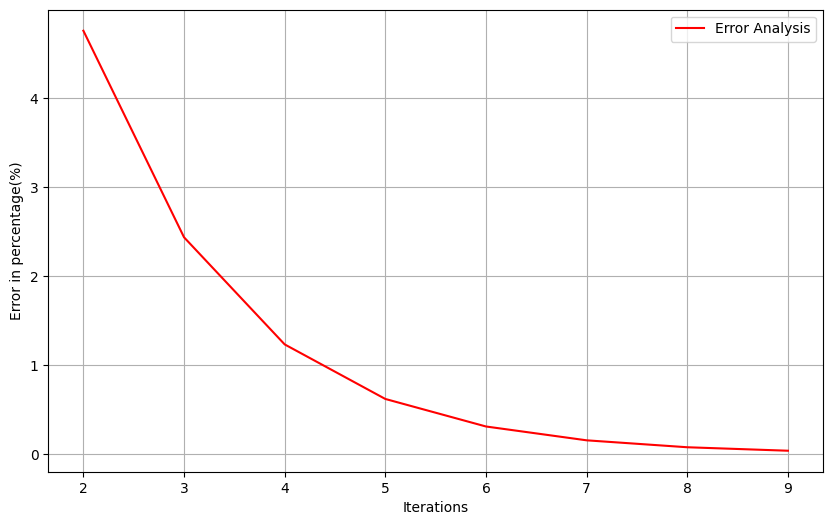

In [196]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(len(results)):
    x.append(i+1)
    y.append(results[i]['ea(%)'])
    
    
plt.plot(x,y,color='red',label="Error Analysis")
plt.xlabel("Iterations")
plt.ylabel("Error in percentage(%)")
plt.legend()
plt.grid()
plt.show()